In [1]:
import imp, table_loading_test
import time
imp.reload(table_loading_test)

/orange/adamginsburg/miniconda3/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/orange/adamginsburg/miniconda3/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


<module 'table_loading_test' from '/home/btingle/table_loading_test.py'>

In [2]:
from table_loading_test import *

In [3]:
tbl = Table.read(f'/home/btingle/tbl_G328', format='fits')
tbl.add_index('SPICY')

In [4]:
filepath = '/blue/adamginsburg/adamginsburg/ALMA_IMF/SPICY_ALMAIMF/SED_figures/'

In [5]:
spicyid = 31423
fieldid = 'G328'

# Multi-geometry fitting

In [6]:
rownum = tbl.loc_indices[spicyid]

In [7]:
flx, error, valid = get_data_to_fit(rownum, tbl, filters=filternames+["ALMA-IMF_1mm", "ALMA-IMF_3mm"])
apertures = [2, 2, 2, 2, 2, 2.4, 2.4, 2.4, 2.4, 6, 10, 13.5, 23, 30, 41, 3, 3]*u.arcsec

In [8]:
start = time.time()
fits = {geom:
        fit_a_source(data=flx,#.quantity,
             error=error,#.quantity,
             valid=valid, aperture_size=apertures,#.quantity,
             filters=filternames+["ALMA-IMF_1mm", "ALMA-IMF_3mm"],#.quantity,
                   av_range=[5,40],
                   distance_range=[2300,2500]*u.pc,
                     geometry=geom,
                  )
        for geom in geometries}
duration = time.time()-start
print(f"end at t={duration}")
#start = start+duration

 ------------------------------------------------------------
  => Model parameters
 ------------------------------------------------------------

   Models              :  s-pbhmi
   Log[d] stepping     :  0.02
   Number of distances :  3

 ------------------------------------------------------------
  => Reading in convolved fluxes
 ------------------------------------------------------------



   Reading /blue/adamginsburg/richardson.t/research/flux/robitaille_models//s-pbhmi/convolved/Paranal/VISTA.Y.fits
   Reading /blue/adamginsburg/richardson.t/research/flux/robitaille_models//s-pbhmi/convolved/Paranal/VISTA.Z.fits
   Reading /blue/adamginsburg/richardson.t/research/flux/robitaille_models//s-pbhmi/convolved/Paranal/VISTA.J.fits
   Reading /blue/adamginsburg/richardson.t/research/flux/robitaille_models//s-pbhmi/convolved/Paranal/VISTA.H.fits
   Reading /blue/adamginsburg/richardson.t/research/flux/robitaille_models//s-pbhmi/convolved/Paranal/VISTA.Ks.fits
   Reading /blue/adamginsburg/richardson.t/research/flux/robitaille_models//s-pbhmi/convolved/Spitzer/IRAC.I1.fits
   Reading /blue/adamginsburg/richardson.t/research/flux/robitaille_models//s-pbhmi/convolved/Spitzer/IRAC.I2.fits
   Reading /blue/adamginsburg/richardson.t/research/flux/robitaille_models//s-pbhmi/convolved/Spitzer/IRAC.I3.fits
   Reading /blue/adamginsburg/richardson.t/research/flux/robitaille_models//s-p

In [9]:
from astropy.table import QTable
datatable = QTable([filternames+["ALMA-IMF_1mm", "ALMA-IMF_3mm"], flx * u.mJy, error * u.mJy, valid], names=['band','flux','error','valid'])

# Plotting

In [10]:
tbl['ALMA-IMF_1mm_flux','ALMA-IMF_3mm_flux']

ALMA-IMF_1mm_flux,ALMA-IMF_3mm_flux
Jy / beam,Jy / beam
float64,float64
--,--
--,--
--,--
--,--
--,0.8062309079895377
1.3557265677295753,1.3720629074953667
--,--
82.70039656216524,6.8374883042446


In [11]:
import pylab as pl
pl.style.use('dark_background')
pl.rcParams['font.size'] = 16

In [12]:
from astropy.modeling.models import BlackBody

In [13]:
if not np.isnan(tbl['ALMA-IMF_1mm_flux'][rownum]):
    almavalue = tbl['ALMA-IMF_1mm_flux'][rownum]
elif not np.isnan(tbl['ALMA-IMF_3mm_flux'][rownum]):
    almavalue = tbl['ALMA-IMF_3mm_flux'][rownum]
else:
    almavalue = np.nan
    
# NEED TO MODIFY BASED ON WAVELENGTH

mass_ul = (((almavalue)*u.mJy * (2.5*u.kpc)**2) / (0.008*u.cm**2/u.g * BlackBody(20*u.K)(230*u.GHz) * u.sr)).to(u.M_sun)

In [14]:
almavalue, mass_ul

(768.4964225841379, <Quantity 118.035878 solMass>)

In [15]:
%run plot_fit_test.py

In [16]:
{geom: np.nanmin(fitinfo.chi2) for geom, fitinfo in fits.items()}

{'s-pbhmi': <Quantity 38202.45554591>,
 's-pbsmi': <Quantity 18658.48762786>,
 'sp--h-i': <Quantity 2835556.11595863>,
 's-p-hmi': <Quantity 38740.64097647>,
 'sp--hmi': <Quantity 8210512.16732476>,
 'sp--s-i': <Quantity 6589833.82549038>,
 's-p-smi': <Quantity 51947110.12898194>,
 'sp--smi': <Quantity 21931414.61584705>,
 'spubhmi': <Quantity 40179.69442252>,
 'spubsmi': <Quantity 321218.36505474>,
 'spu-hmi': <Quantity 44080.66486025>,
 'spu-smi': <Quantity 7414293.26040896>,
 's---s-i': <Quantity 3.67716582e+08>,
 's---smi': <Quantity 4.24409146e+08>,
 's-ubhmi': <Quantity 42629.25392557>,
 's-ubsmi': <Quantity 15955037.65873551>,
 's-u-hmi': <Quantity 74936.2021813>,
 's-u-smi': <Quantity 15977746.75323753>}

In [17]:
chi2limit = np.nanmin([np.nanmin(fits[geom].chi2) for geom in geometries])*3
if chi2limit < 3:
    chi2limit = 3

modelcount = 0
for geom in geometries:
    for x in fits[geom].chi2:
        if x < chi2limit:
            modelcount = modelcount+1

In [18]:
okgeo = []
chi2limit = np.nanmin([np.nanmin(fits[geom].chi2) for geom in geometries])*3

for geom in geometries:
    # we impose an _absolute_ chi^2 limit (the fitter uses a _relative_, delta chi2 limit)
    print(f"{geom}: {np.nanmin(fits[geom].chi2):12.1f}")
    if np.nanmin(fits[geom].chi2) < chi2limit:
        okgeo.append(geom)
        
print(okgeo)

s-pbhmi:      38202.5
s-pbsmi:      18658.5
sp--h-i:    2835556.1
s-p-hmi:      38740.6
sp--hmi:    8210512.2
sp--s-i:    6589833.8
s-p-smi:   51947110.1
sp--smi:   21931414.6
spubhmi:      40179.7
spubsmi:     321218.4
spu-hmi:      44080.7
spu-smi:    7414293.3
s---s-i:  367716582.3
s---smi:  424409145.6
s-ubhmi:      42629.3
s-ubsmi:   15955037.7
s-u-hmi:      74936.2
s-u-smi:   15977746.8
['s-pbhmi', 's-pbsmi', 's-p-hmi', 'spubhmi', 'spu-hmi', 's-ubhmi']


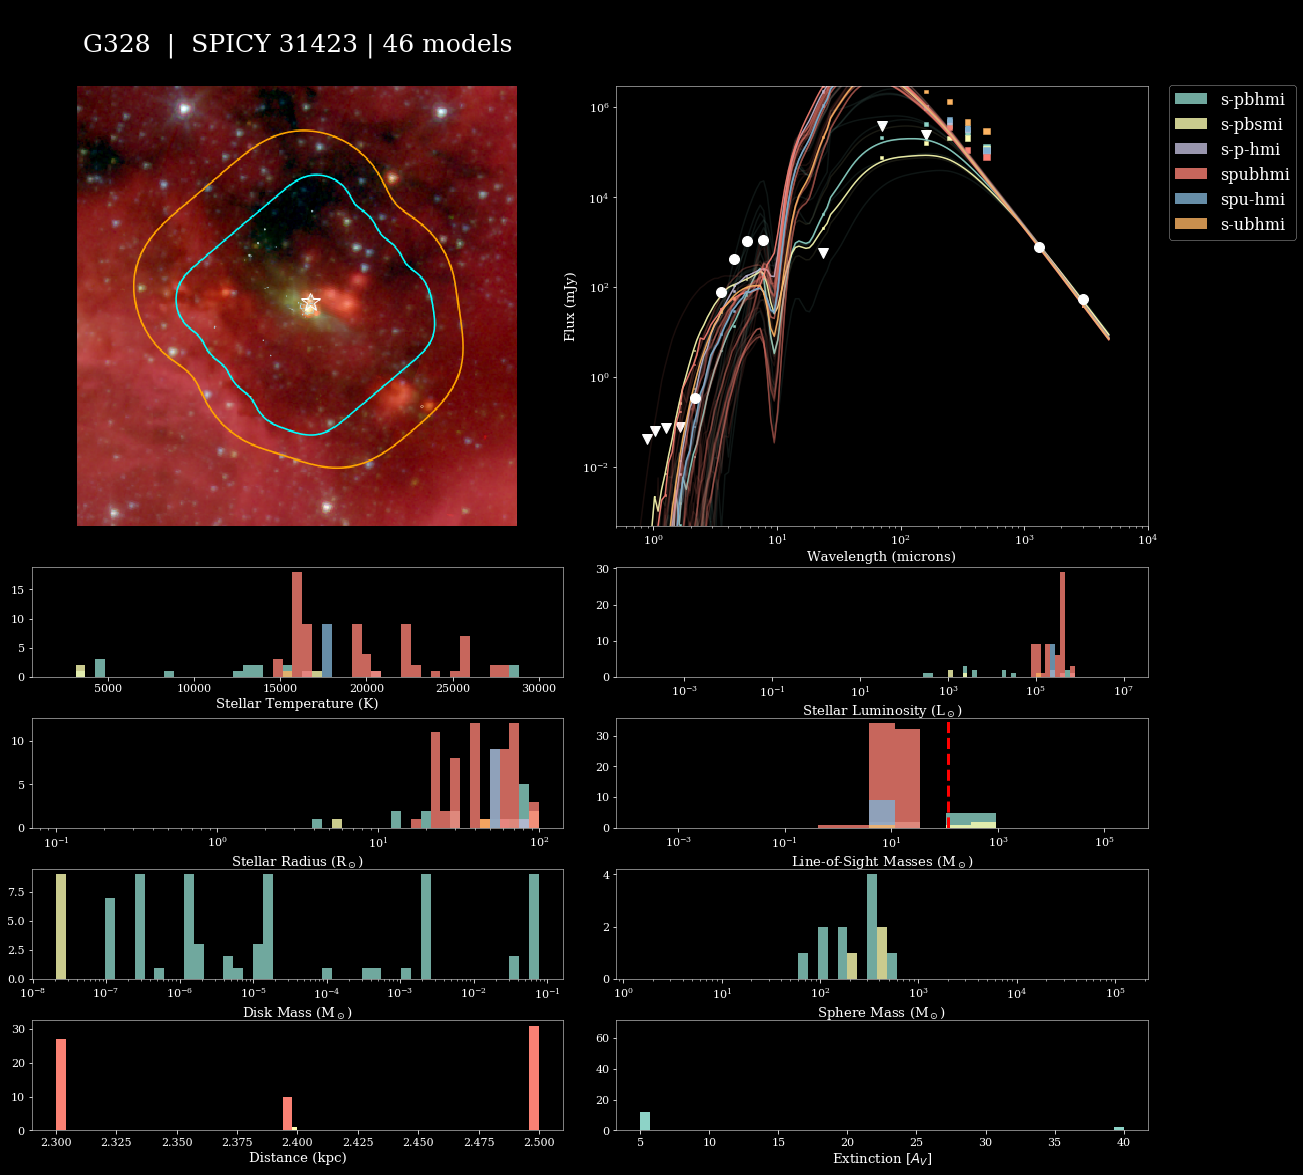

In [19]:
figure = plot_fit(fits, okgeo, deltachi2limit=chi2limit, fieldid='G328', spicyid=spicyid, modelcount=modelcount, almavalue=almavalue, show_all_models=True, alpha_allmodels=0.1, mass_ul=mass_ul)

In [20]:
filepath = '/blue/adamginsburg/adamginsburg/ALMA_IMF/SPICY_ALMAIMF/SED_figures'
if not os.path.exists(f'{filepath}/{fieldid}'):
    os.makedirs(f'{filepath}/{fieldid}')

In [21]:
figure.savefig(f'{filepath}/{fieldid}/{spicyid}.png', overwrite=True)

# Table Data

In [ ]:
from astropy.stats import mad_std

# use the distance to your region (from literature)
regiondistance = 2.5

default_aperture=3*u.arcsec
distance = (regiondistance * u.kpc).mean()
sedcube = SEDCube.read(f"/blue/adamginsburg/richardson.t/research/flux/robitaille_models/s---s-i/flux.fits")
apnum = np.argmin(np.abs((default_aperture * distance).to(u.au, u.dimensionless_angles()) - sedcube.apertures))

all_data = []
extinction_data, distance_data = [], []
for geom in geometries:
    pars, data, selection = datafunction(geom, chi2limit, fits)
    all_data.append(data)
    distance_data.extend(10**fits[geom].sc[selection])
    extinction_data.extend(fits[geom].av[selection])
data = table.vstack(all_data)

star_temp_mean = np.nanmean(np.log10(data['star.temperature']))
model_lum_mean = np.nanmean(np.log10(data['Model Luminosity']))
star_rad_mean = np.nanmean(np.log10(data['star.radius']))
los_mass_mean = np.nanmean(np.log10(data['Line-of-Sight Masses'][:,apnum]))
#disk_mass_mean = np.nanmean(np.log10(data['disk.mass']))
sphere_mass_mean = np.nanmean(np.log10(data['Sphere Masses'][:,apnum]))
distance_mean = np.nanmean(np.log10(distance_data))
ext_mean = np.nanmean(np.log10(extinction_data))

star_temp_std = np.nanstd(np.log10(data['star.temperature']))
model_lum_std = np.nanstd(np.log10(data['Model Luminosity']))
star_rad_std = np.nanstd(np.log10(data['star.radius']))
los_mass_std = np.nanstd(np.log10(data['Line-of-Sight Masses'][:,apnum]))
#disk_mass_std = np.nanstd(np.log10(data['disk.mass']))
sphere_mass_std = np.nanstd(np.log10(data['Sphere Masses'][:,apnum]))
distance_std = np.nanstd(np.log10(distance_data))
ext_std = np.nanstd(np.log10(extinction_data))

star_temp_med = np.nanmedian(np.log10(data['star.temperature']))
model_lum_med = np.nanmedian(np.log10(data['Model Luminosity']))
star_rad_med = np.nanmedian(np.log10(data['star.radius']))
los_mass_med = np.nanmedian(np.log10(data['Line-of-Sight Masses'][:,apnum]))
#disk_mass_med = np.nanmedian(np.log10(data['disk.mass']))
sphere_mass_med = np.nanmedian(np.log10(data['Sphere Masses'][:,apnum]))
distance_med = np.nanmedian(np.log10(distance_data))
ext_med = np.nanmedian(np.log10(extinction_data))

star_temp_mad = mad_std(np.log10(data['star.temperature']))
model_lum_mad = mad_std(np.log10(data['Model Luminosity']))
star_rad_mad = mad_std(np.log10(data['star.radius']))
los_mass_mad = mad_std(np.log10(data['Line-of-Sight Masses'][:,apnum]))
#disk_mass_mad = mad_std(np.log10(data['disk.mass']))
sphere_mass_mad = mad_std(np.log10(data['Sphere Masses'][:,apnum]))
distance_mad = mad_std(np.log10(distance_data))
ext_mad = mad_std(np.log10(extinction_data))

In [ ]:
PARAMETERS = ['star.temperature', 'Model Luminosity', 'star.radius', 'Line-of-Sight Masses', 'Sphere Masses', 'distance', 'extinction']
STD = [star_temp_std, model_lum_std, star_rad_std, los_mass_std, sphere_mass_std, distance_std, ext_std]
MEAN = [star_temp_mean, model_lum_mean, star_rad_mean, los_mass_mean, sphere_mass_mean, distance_mean, ext_mean]
Median = [star_temp_med, model_lum_med, star_rad_med, los_mass_med, sphere_mass_med, distance_med, ext_med]
MAD = [star_temp_mad, model_lum_mad, star_rad_mad, los_mass_mad, sphere_mass_mad, distance_mad, ext_mad]

parameter_table = Table([PARAMETERS, MEAN, STD, Median, MAD],
                        names=('Parameters', 'Mean', 'Standard Deviation','Median','Median Absolute Deviation'))
parameter_table

In [ ]:
for parameter in ['Temperature','Luminosity','Radius',
                  'LOS mass','Sphere mass','Distance','Extinction']:
    for new_column_name in (f'{parameter} mean',
                        f'{parameter} standard deviation',
                        f'{parameter} Median',
                        f'{parameter} MAD'):
        if new_column_name not in tbl.colnames:
            tbl[new_column_name] = np.nan

if 'Included Geometries' not in tbl.colnames:
    tbl['Included Geometries'] = ",".join(geometries)

if 'Chi2 threshold' not in tbl.colnames:
    tbl['Chi2 threshold'] = np.nan

if 'NumberOfModels' not in tbl.colnames:
    tbl['NumberOfModels'] = 99999

In [ ]:
tbl['Temperature mean'][rownum] = star_temp_mean
tbl['Temperature standard deviation'][rownum] = star_temp_std
tbl['Temperature Median'][rownum] = star_temp_med
tbl['Temperature MAD'][rownum] = star_temp_mad

tbl['Luminosity mean'][rownum] = model_lum_mean
tbl['Luminosity standard deviation'][rownum] = model_lum_std
tbl['Luminosity Median'][rownum] = model_lum_med
tbl['Luminosity MAD'][rownum] = model_lum_mad

tbl['Radius mean'][rownum] = star_rad_mean
tbl['Radius standard deviation'][rownum] = star_rad_std
tbl['Radius Median'][rownum] = star_rad_med
tbl['Radius MAD'][rownum] = star_rad_mad

tbl['LOS mass mean'][rownum] = los_mass_mean
tbl['LOS mass standard deviation'][rownum] = los_mass_std
tbl['LOS mass Median'][rownum] = los_mass_med
tbl['LOS mass MAD'][rownum] = los_mass_mad

tbl['Sphere mass mean'][rownum] = sphere_mass_mean
tbl['Sphere mass standard deviation'][rownum] = sphere_mass_std
tbl['Sphere mass Median'][rownum] = sphere_mass_med
tbl['Sphere mass MAD'][rownum] = sphere_mass_mad

tbl['Distance mean'][rownum] = distance_mean
tbl['Distance standard deviation'][rownum] = distance_std
tbl['Distance Median'][rownum] = distance_med
tbl['Distance MAD'][rownum] = distance_mad

tbl['Extinction mean'][rownum] = ext_mean
tbl['Extinction standard deviation'][rownum] = ext_std
tbl['Extinction Median'][rownum] = ext_med
tbl['Extinction MAD'][rownum] = ext_mad

tbl['Included Geometries'][rownum] = ",".join(okgeo)
tbl['Chi2 threshold'][rownum] = chi2limit
tbl['NumberOfModels'][rownum] = modelcount

In [ ]:
tbl[rownum]

# Write

In [ ]:
tbl.write(f'/blue/adamginsburg/adamginsburg/ALMA_IMF/SPICY_ALMAIMF/tables/tbl_G328', format='fits', overwrite=True)

In [ ]:
tbl.write(f'/home/btingle/tbl_G328', format='fits', overwrite=True)

# Fullsample fitinfo

In [ ]:
sedcube.apertures[9]

In [ ]:
def minmaxval(param,okgeo):
    minvals,maxvals = [],[]
    
    for geom in okgeo:
        pars_geom = Table.read(f'/blue/adamginsburg/richardson.t/research/flux/pars/{geom}_augmented.fits')
        if param in pars_geom.keys():
            if param in ('Line-of-Sight Masses','Sphere Masses'):
                data = pars_geom[param][:,apnum]
            else:
                data = pars_geom[param]
            minval,maxval = data[data>0].min(), np.nanmax(data)
            minvals.append(minval)
            maxvals.append(maxval)
    
    minval,maxval = np.nanmin(minvals), np.nanmax(maxvals)
    
    return minval,maxval

Let's generate the min/max values for each param so I don't have to run calculations

In [ ]:
histparams = ['star.temperature','Model Luminosity',
              'star.radius','Line-of-Sight Masses',
              'disk.mass','Sphere Masses']
bounds = {}
for param in histparams:
    if param in pars.keys():
        minval,maxval = minmaxval(param,okgeo)
        bounds[param] = (minval, maxval)

In [ ]:
basefig = plt.figure(figsize=(20, 10))
gs = GridSpec(nrows=3, ncols=2, hspace=0.35, wspace=0.1)

ax1 = basefig.add_subplot(gs[0, 0])
ax2 = basefig.add_subplot(gs[0, 1])
ax3 = basefig.add_subplot(gs[1, 0])
ax4 = basefig.add_subplot(gs[1, 1])
ax5 = basefig.add_subplot(gs[2, 0])
ax6 = basefig.add_subplot(gs[2, 1])

all_alpha = 0.05
fit_alpha = 0.9

for geom in okgeo:
    pars, data, selection = datafunction(geom, chi2limit, fits)
    if 'star.temperature' in pars.keys():
        bins = np.logspace(np.log10(bounds['star.temperature'][0]),np.log10(bounds['star.temperature'][1]))
        _,_,patches=ax1.hist(pars['star.temperature'], bins=bins, alpha=all_alpha, label=geom)
        ax1.hist(data['star.temperature'], bins=bins, alpha=fit_alpha, color=patches[0].get_facecolor())
        
    if 'Model Luminosity' in pars.keys():
        bins = np.logspace(np.log10(bounds['Model Luminosity'][0]),np.log10(bounds['Model Luminosity'][1]))
        _,_,patches=ax2.hist(pars['Model Luminosity'], bins=bins, alpha=all_alpha, label=geom)
        ax2.hist(data['Model Luminosity'], bins=bins, alpha=fit_alpha, color=patches[0].get_facecolor())
        
    if 'star.radius' in pars.keys():
        bins = np.logspace(np.log10(bounds['star.radius'][0]),np.log10(bounds['star.radius'][1]))
        _,_,patches=ax3.hist(pars['star.radius'], bins=bins, alpha=all_alpha, label=geom)
        ax3.hist(data['star.radius'], bins=bins, alpha=fit_alpha, color=patches[0].get_facecolor())
        
    if 'Line-of-Sight Masses' in pars.keys():
        bins = np.logspace(np.log10(bounds['Line-of-Sight Masses'][0]),np.log10(bounds['Line-of-Sight Masses'][1]))
        _,_,patches=ax4.hist(pars['Line-of-Sight Masses'][:,apnum], bins=bins, alpha=all_alpha, label=geom)
        ax4.hist(data['Line-of-Sight Masses'][:,apnum], bins=bins, alpha=fit_alpha, color=patches[0].get_facecolor())
        
    if 'disk.mass' in pars.keys():
        bins = np.logspace(np.log10(bounds['disk.mass'][0]),np.log10(bounds['disk.mass'][1]))
        _,_,patches=ax5.hist(pars['disk.mass'], bins=bins, alpha=all_alpha, label=geom)
        ax5.hist(data['disk.mass'], bins=bins, alpha=fit_alpha, color=patches[0].get_facecolor())

    if 'Sphere Masses' in pars.keys():
        bins = np.logspace(np.log10(bounds['Sphere Masses'][0]),np.log10(bounds['Sphere Masses'][1]))
        _,_,patches=ax6.hist(pars['Sphere Masses'][:,apnum], bins=bins, alpha=all_alpha, label=geom)
        ax6.hist(data['Sphere Masses'][:,apnum], bins=bins, alpha=fit_alpha, color=patches[0].get_facecolor())

ax1.loglog()
ax2.loglog()
ax3.loglog()
ax4.loglog()
ax5.loglog()
ax6.loglog()

handles, labels = ax1.get_legend_handles_labels()

legend = ax2.legend(handles, labels, loc='upper center', bbox_to_anchor=(1.16,1.08))
for lh in legend.legendHandles:
    lh.set_alpha(fit_alpha)

ax1.set_xlabel("Stellar Temperature (K)")
ax2.set_xlabel("Stellar Luminosity (L$_\odot$)")
ax3.set_xlabel("Stellar Radius (R$_\odot$)")
ax4.set_xlabel("Line-of-Sight Masses* (M$_\odot$)")
ax5.set_xlabel("Disk Mass (M$_\odot$)")
ax6.set_xlabel("Sphere Mass* (M$_\odot$)")

# $^1$ for superscript

ttl = ax1.set_title(f'\n{fieldid}  |  SPICY {spicyid} | {modelcount} models\n', fontsize=25)

#ax6.text(0.0, 0.0, f'Line-of-sight mass and Sphere mass assume aperture size of {sedcube.apertures[9].round(0)}', ha="center", fontsize=18)

footnote = ax6.set_title(f'* Mass parameters assume aperture size of {sedcube.apertures[9].round(0)}\n', fontsize=13)
footnote.set_position([0.5, -0.6])

In [125]:
bounds.keys()

dict_keys(['star.temperature', 'Model Luminosity', 'star.radius', 'Line-of-Sight Masses', 'Sphere Masses'])

In [ ]:
tbl